# Laptop Data : Machine Learning

## Predict the price of laptop

### 1. Determine the problem

There are 1260 given data sets. With these sets, we need to predict the price of laptop.

From this machine learning, we will make a model that solves this question : "A laptop with these specifications, how much will this be?"

In [1]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from pandas import DataFrame as df

### 2. Import Data

In [2]:
train_cp = pd.read_csv("C:/Users/queenSSH/Desktop/학교/CUAI/IMC_march/Adv_IMC_train.csv")
test_cp = pd.read_csv("C:/Users/queenSSH/Desktop/학교/CUAI/IMC_march/Adv_IMC_test.csv")

train = train_cp.copy()
train_len = len(train)
test = test_cp.copy()

### 3. Exploratory data analysis

let's briefly see our data

In [3]:
train.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
0,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.86kg,393.9
1,Asus,X541NA (N3350/4GB/1TB/FHD/W10),Notebook,NaN,Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Windows 10,2kg,344.0
2,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
3,Dell,Inspiron 7559,Gaming,15.6,IPS Panel Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.72kg,1099.0
4,Razer,Blade Stealth,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.29kg,1799.0


In [4]:
test.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,Toshiba,Portege X30-D-10J,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.05kg
1,HP,Spectre 13-V100nv,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.11kg
2,Lenovo,IdeaPad 310-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A10-Series 9600P 2.4GHz,6GB,1TB HDD,AMD Radeon R5 430,Windows 10,2.4kg
3,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg
4,HP,EliteBook 820,Ultrabook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.26kg


In [5]:
print(train.shape, test.shape)

(1042, 12) (261, 11)


#### Summary of data
+ Company 
+ Product
+ TypeName
+ Inches
+ ScreenResolution
+ Cpu
+ Ram
+ Memory
+ Gpu
+ OpSys
+ Weight

In [6]:
train['Company'].unique()

array(['HP', 'Asus', 'Dell', 'Razer', 'Google', 'LG', 'MSI', 'Acer',
       'Apple', 'Lenovo', 'Toshiba', 'Vero', 'Mediacom', 'Samsung',
       'Microsoft', 'Chuwi', 'Xiaomi', 'Huawei', 'Fujitsu'], dtype=object)

In [7]:
train['TypeName'].value_counts()

Notebook              574
Gaming                166
Ultrabook             163
2 in 1 Convertible     91
Netbook                24
Workstation            24
Name: TypeName, dtype: int64

In [8]:
train['Weight'].value_counts()

2.2kg     92
2.1kg     50
2.4kg     34
2kg       30
2.3kg     29
          ..
3.58kg     1
1.14kg     1
2.79kg     1
1.55kg     1
1.12kg     1
Name: Weight, Length: 170, dtype: int64

Lets see our price histogram

<AxesSubplot:title={'center':'Original Price Histogram'}, xlabel='price', ylabel='Count'>

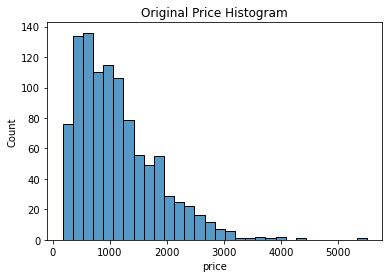

In [9]:
plt.title('Original Price Histogram')
sns.histplot(train['price'])

<AxesSubplot:title={'center':'Log transformed Prce Histogram'}, xlabel='price', ylabel='Count'>

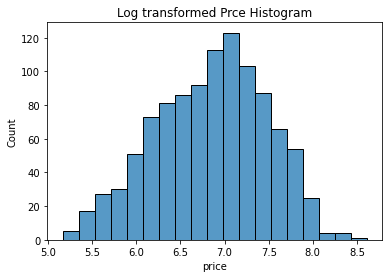

In [10]:
plt.title('Log transformed Prce Histogram')
log_price = np.log1p(train['price'])
sns.histplot(log_price)

In [11]:
original_price = train['price']
train['price'] = np.log1p(train['price'])

### 4. Feature Engineering

We will convert out feature to make machine learning algorithms work

First, let's combine our data

In [12]:
combined_data = pd.concat([train.drop('price', axis=1), test], axis=0)
combined_data.reset_index(drop=True, inplace=True)

train_len = len(train)

combined_data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.86kg
1,Asus,X541NA (N3350/4GB/1TB/FHD/W10),Notebook,NaN,Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Windows 10,2kg
2,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg
3,Dell,Inspiron 7559,Gaming,15.6,IPS Panel Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.72kg
4,Razer,Blade Stealth,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.29kg


Find if there are NA datas

In [13]:
combined_data.isnull().sum()

Company              0
Product              0
TypeName             0
Inches              17
ScreenResolution     0
Cpu                  0
Ram                  0
Memory               0
Gpu                  0
OpSys                0
Weight               0
dtype: int64

There are 17 missing Data in Inches

Lets fill the Float type columns NA with their mean

In [14]:
# 결측치 대체하는 : fillna()
combined_data['Inches'].fillna(combined_data['Inches'].mean(), inplace=True)

In [15]:
combined_data.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
dtype: int64

In [16]:
combined_data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,HP,250 G6,Notebook,15.600000,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.86kg
1,Asus,X541NA (N3350/4GB/1TB/FHD/W10),Notebook,15.010109,Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Windows 10,2kg
2,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.600000,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg
3,Dell,Inspiron 7559,Gaming,15.600000,IPS Panel Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.72kg
4,Razer,Blade Stealth,Ultrabook,12.500000,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.29kg


Let's exchange the object data to float : 

Ram, Memory features

In [17]:
combined_data_cp = combined_data.copy()

In [18]:
combined_data_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


In [19]:
# kg제거
combined_data_cp["Weight"] = combined_data_cp["Weight"].str.replace('kg', '')

In [20]:
#GB 제거
combined_data_cp["Ram"] = combined_data_cp["Ram"].str.replace('GB', '')

In [21]:
combined_data_cp["Ram"] = combined_data_cp["Ram"].astype(int)
combined_data_cp["Weight"] = combined_data_cp["Weight"].astype(float)

In [22]:
combined_data = combined_data_cp

In [23]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
dtypes: float64(2), int32(1), object(8)
memory usage: 107.0+ KB


In [24]:
# skew 높은 피쳐 로그변환
from scipy.stats import skew

# object가 아닌 숫자형 피쳐의 컬럼 index 객체 추출.
features_index = combined_data.dtypes[combined_data.dtypes != 'object'].index

skew_features = combined_data[features_index].apply(lambda x : skew(x))

# skew 정도가 1 이상인 컬럼들만 추출하기
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

Ram       2.683712
Weight    1.143644
dtype: float64


In [25]:
# 로그변환
combined_data[skew_features_top.index] = np.log1p(combined_data[skew_features_top.index])

Now, Label Encoding the Categorical columns

For example, TypeName : 

In [26]:
combined_data.TypeName.value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [27]:
# 원핫 인코딩
combined_data=pd.get_dummies(combined_data)

In [28]:
combined_data.head()

,Inches,Ram,Weight,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,15.600000,1.609438,1.050822,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,15.010109,1.609438,1.098612,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,15.600000,1.945910,1.160021,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,15.600000,2.833213,1.313724,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,12.500000,2.833213,0.828552,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Lets split the data back to train and test

In [29]:
#인덱싱

clean_train_cp = combined_data.iloc[:train_len, :]
clean_test_cp = combined_data.iloc[train_len:,:]

In [30]:
clean_train_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Columns: 962 entries, Inches to OpSys_macOS
dtypes: float64(3), uint8(959)
memory usage: 1000.4 KB


Add the column price from train data

In [31]:
clean_train = clean_train_cp.copy()

clean_train['price'] = train.loc[:,'price']

clean_test = clean_test_cp.copy()

In [32]:
print(clean_train.shape, clean_test.shape)

(1042, 963) (261, 962)


In [33]:
clean_train

,Inches,Ram,Weight,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,price
0,15.600000,1.609438,1.050822,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5.978633
1,15.010109,1.609438,1.098612,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5.843544
2,15.600000,1.945910,1.160021,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,6.639876
3,15.600000,2.833213,1.313724,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,7.003065
4,12.500000,2.833213,0.828552,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,7.495542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,15.600000,2.197225,1.223775,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,6.684612
1038,15.600000,2.197225,1.111858,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,6.445720
1039,15.600000,1.945910,1.111858,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,6.311717
1040,15.600000,2.197225,1.193922,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,6.747187


In [34]:
clean_test.head(5)

,Inches,Ram,Weight,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
1042,13.3,2.197225,0.717840,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1043,13.3,2.197225,0.746688,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1044,15.6,1.945910,1.223775,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1045,15.6,2.197225,1.280934,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1046,12.5,1.609438,0.815365,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### 5. Modelling

#### Function that calculates RMSE

In [35]:
def get_rmse(model):
    pred = model.predict(test_input)
    mse = mean_squared_error(test_target, pred)
    rmse = np.sqrt(mse)
    
    print('{0} 로그 변환된 RSME : {1}'.format(model.__class__.__name__,np.round(rmse,3)))
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [43]:
# 모델링

data_features = clean_train.drop(['price'], axis=1)
price =clean_train['price']

train_input, test_input, train_target, test_target = train_test_split(data_features, price, random_state = 42)

#LinearRegression, Ridge, Lasso 학습, 예측, 평가하기
lr_reg=LinearRegression()
lr_reg.fit(train_input, train_target)
pred_lr=lr_reg.predict(test_input)

ridge_reg = Ridge()
ridge_reg.fit(train_input, train_target)
pred_ridge=ridge_reg.predict(test_input)
print(np.sqrt(mean_squared_error(np.expm1(test_target), np.expm1(pred_ridge))))

lasso_reg = Lasso()
lasso_reg.fit(train_input, train_target)
pred_lasso=lasso_reg.predict(test_input)
print(np.sqrt(mean_squared_error(np.expm1(test_target), np.expm1(pred_lasso))))

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

300.1094953987381
655.5971963156748
LinearRegression 로그 변환된 RSME : 85762570107.6
Ridge 로그 변환된 RSME : 0.208
Lasso 로그 변환된 RSME : 0.617


[85762570107.6002, 0.20757439851859213, 0.6171569234463657]

In [37]:
data_features

,Inches,Ram,Weight,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,15.600000,1.609438,1.050822,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,15.010109,1.609438,1.098612,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,15.600000,1.945910,1.160021,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,15.600000,2.833213,1.313724,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,12.500000,2.833213,0.828552,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,15.600000,2.197225,1.223775,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1038,15.600000,2.197225,1.111858,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1039,15.600000,1.945910,1.111858,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1040,15.600000,2.197225,1.193922,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### Best Parameters

In [38]:
def print_best_params(model, params):
    grid_model= GridSearchCV(model, param_grid=params,
                            scoring = 'neg_mean_squared_error', cv = 5)
    grid_model.fit(data_features, price)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값 : {1}, 최적 alpha: {2}'.format(model.__class__.__name__,
                                        np.round(rmse,4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = {'alpha': [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha': [0.001,0.005,0.008,0.05,0.03,0.1,0.5,1.5,10]}

best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값 : 0.2084, 최적 alpha: {'alpha': 1}
Lasso 5 CV 시 최적 평균 RMSE 값 : 0.2471, 최적 alpha: {'alpha': 0.001}


#### Using the best parameters

In [39]:
lr_reg = LinearRegression()
lr_reg.fit(train_input, train_target)
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(train_input, train_target)
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(train_input, train_target)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RSME : 85762570107.6
Ridge 로그 변환된 RSME : 0.208
Lasso 로그 변환된 RSME : 0.248


[85762570107.6002, 0.20757439851859213, 0.24807582820546992]

#### Final Prediction

In [40]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(test_target, pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE : {1}'.format(key,rmse))
        
lr_reg = LinearRegression()
lr_reg.fit(train_input, train_target)
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(train_input, train_target)
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(train_input, train_target)

ridge_pred = ridge_reg.predict(test_input)
lasso_pred = lasso_reg.predict(test_input)

preds = {'Ridge' : ridge_pred, 'Lasso' : lasso_pred}

get_rmse_pred(preds)

Ridge 모델의 RMSE : 0.22646184452999335
Lasso 모델의 RMSE : 0.24807582820546992


In [46]:
from pandas import DataFrame as df

ridge_reg.fit(data_features, price)
prediction = ridge_reg.predict(clean_test)

prediction = np.expm1(prediction)
df = df(data = {'price': prediction})
df

,price
0,1313.144823
1,1055.659310
2,638.007213
3,797.723172
4,1165.916600
...,...
256,1470.559381
257,1055.550586
258,1836.333135
259,1517.235332


In [45]:
df.to_csv('신수현_Adv_price.csv', index=False)